In [1]:
import pyarrow.parquet as pq
import datetime
import pandas as pd
import numpy as np

In [2]:
df = pq.read_table(source='integratedData.parquet.gz').to_pandas()

In [3]:
df.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


In [4]:
df_sorted = df.sort_values(['latitude', 'longitude','date'], ascending=[True,True,True])

In [5]:
df_sorted.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
1268,1999-01-01,0.0,49.5,0.00653,155.3,348.0,2.6,290.7,281.0,26.0,17.2,16.6,30.0,1.7,0.47,False,NaN,None,-117.141667,32.483333
2660,1999-01-02,0.0,54.3,0.00656,157.5,358.0,2.3,291.3,281.1,24.0,17.2,16.5,30.0,1.7,0.51,False,NaN,None,-117.141667,32.483333
4052,1999-01-03,0.0,41.1,0.00581,160.8,38.0,3.3,293.4,279.9,29.0,16.8,16.4,32.0,2.4,0.73,False,NaN,None,-117.141667,32.483333
5444,1999-01-04,0.0,23.9,0.00437,160.7,62.0,2.3,295.4,281.9,28.0,14.6,16.1,37.0,2.6,1.20,False,NaN,None,-117.141667,32.483333
6836,1999-01-05,0.0,24.1,0.00556,160.7,347.0,2.5,294.4,282.2,30.0,13.2,15.9,39.0,2.4,0.94,False,NaN,None,-117.141667,32.483333


In [6]:
sam = df_sorted.set_index(['latitude', 'longitude'])

In [7]:
sam.head()

date  precipitation_amount_mm  \
latitude  longitude                                         
32.483333 -117.141667 1999-01-01                      0.0   
          -117.141667 1999-01-02                      0.0   
          -117.141667 1999-01-03                      0.0   
          -117.141667 1999-01-04                      0.0   
          -117.141667 1999-01-05                      0.0   

                       relative_humidity_%  specific_humidity_kg/kg  \
latitude  longitude                                                   
32.483333 -117.141667                 49.5                  0.00653   
          -117.141667                 54.3                  0.00656   
          -117.141667                 41.1                  0.00581   
          -117.141667                 23.9                  0.00437   
          -117.141667                 24.1                  0.00556   

                       surface_downwelling_shortwave_flux_in_air_W m-2  \
latitude  longitude                                                      
32.483333 -117.141667                                            155.3   
          -117.141667                                            157.5   
          -117.141667                                            160.8   
          -117.141667                                            160.7   
          -117.141667                                            160.7   

                       wind_from_direction_Degrees Clockwise from north  \
latitude  longitude                                                       
32.483333 -117.141667                                             348.0   
          -117.141667                                             358.0   
          -117.141667                                              38.0   
          -117.141667                                              62.0   
          -117.141667                                             347.0   

                       wind_speed_m/s  max_air_temperature_K  \
latitude  longitude                                            
32.483333 -117.141667             2.6                  290.7   
          -117.141667             2.3                  291.3   
          -117.141667             3.3                  293.4   
          -117.141667             2.3                  295.4   
          -117.141667             2.5                  294.4   

                       min_air_temperature_K  burning_index_g_Unitless  \
latitude  longitude                                                      
32.483333 -117.141667                  281.0                      26.0   
          -117.141667                  281.1                      24.0   
          -117.141667                  279.9                      29.0   
          -117.141667                  281.9                      28.0   
          -117.141667                  282.2                      30.0   

                       dead_fuel_moisture_100hr_Percent  \
latitude  longitude                                       
32.483333 -117.141667                              17.2   
          -117.141667                              17.2   
          -117.141667                              16.8   
          -117.141667                              14.6   
          -117.141667                              13.2   

                       dead_fuel_moisture_1000hr_Percent  \
latitude  longitude                                        
32.483333 -117.141667                               16.6   
          -117.141667                               16.5   
          -117.141667                               16.4   
          -117.141667                               16.1   
          -117.141667                               15.9   

                       energy_release_component-g_Unitless  \
latitude  longitude                                          
32.483333 -117.141667                                 30.0   
          -117.141667                                 30.0   
      

In [8]:
sam[sam['fire_occurred']==True]

date  precipitation_amount_mm  \
latitude  longitude                                         
32.525000 -116.933333 2003-10-26                      0.0   
          -116.891667 2003-10-26                      0.0   
          -116.850000 2003-10-26                      0.0   
          -116.850000 2007-10-24                      0.0   
          -116.850000 2007-10-25                      0.0   
          -116.808333 2003-10-26                      0.0   
          -116.808333 2007-10-21                      0.0   
          -116.808333 2007-10-24                      0.0   
          -116.808333 2007-10-25                      0.0   
          -116.808333 2007-10-27                      0.0   
          -116.766667 2003-10-26                      0.0   
          -116.766667 2005-10-05                      0.0   
          -116.766667 2007-10-21                      0.0   
          -116.766667 2007-10-22                      0.0   
          -116.766667 2007-10-23                      0.0   
          -116.766667 2007-10-24                      0.0   
          -116.766667 2007-10-25                      0.0   
          -116.766667 2007-10-27                      0.0   
          -116.725000 2005-10-05                      0.0   
          -116.725000 2007-10-24                      0.0   
          -116.725000 2007-10-25                      0.0   
          -116.683333 2005-10-05                      0.0   
32.566667 -116.933333 2003-10-26                      0.0   
          -116.933333 2007-10-21                      0.0   
          -116.933333 2007-10-24                      0.0   
          -116.933333 2007-10-25                      0.0   
          -116.933333 2007-10-27                      0.0   
          -116.891667 2003-10-26                      0.0   
          -116.891667 2007-10-21                      0.0   
          -116.891667 2007-10-24                      0.0   
...                          ...                      ...   
33.441667 -117.475000 2002-05-13                      0.0   
          -117.433333 2003-10-21                      0.0   
          -117.391667 2003-10-21                      0.0   
          -117.100000 2004-05-02                      0.0   
          -117.058333 2004-05-02                      0.0   
          -117.016667 2004-05-02                      0.0   
          -116.975000 2004-05-02                      0.0   
33.483333 -117.058333 2004-05-02                      0.0   
          -117.016667 2004-05-02                      0.0   
          -116.975000 2004-05-02                      0.0   
          -116.933333 2004-05-02                      0.0   
          -116.891667 2004-04-25                      0.0   
          -116.850000 2004-04-25                      0.0   
33.525000 -116.850000 2012-08-14                      0.0   
          -116.850000 2012-08-15                      0.0   
          -116.850000 2012-08-16                      0.5   
33.566667 -117.641667 2002-05-13                      0.0   
          -117.600000 2002-05-13                      0.0   
          -117.058333 2003-10-26                      0.0   
          -117.016667 2003-10-26                      0.0   
          -116.975000 2003-10-26                      0.0   
          -116.933333 2004-07-17                      0.0   
          -116.891667 2004-07-17                      0.0   
          -116.891667 2012-08-14                      0.0   
          -116.891667 2012-08-15                      0.0   
          -116.891667 2012-08-16                      0.6   
          -116.850000 2004-07-17                      0.0   
          -116.850000 2012-08-14                      0.0   
          -116.850000 2012-08-15                      0.0   
          -116.850000 2012-08-16                      0.5   

                       relative_humidity_%  specific_humidity_kg/kg  \
latitude  longitude                                                   
32.525000 -116.933333                  8.9

In [9]:
df_2016 = sam[(sam['date']>=pd.Timestamp(datetime.date(year=2010,month=1,day=1)))]
df_2016 = df_2016[(df_2016['date']<pd.Timestamp(datetime.date(year=2019,month=12,day=31)))]
df_2016.drop(['acres_burned','fire_name'],axis = 1,inplace=True)

In [10]:
df_2016.head()

date  precipitation_amount_mm  \
latitude  longitude                                         
32.483333 -117.141667 2010-01-01                      0.0   
          -117.141667 2010-01-02                      0.0   
          -117.141667 2010-01-03                      0.0   
          -117.141667 2010-01-04                      0.0   
          -117.141667 2010-01-05                      0.0   

                       relative_humidity_%  specific_humidity_kg/kg  \
latitude  longitude                                                   
32.483333 -117.141667                 25.2                  0.00479   
          -117.141667                 26.0                  0.00594   
          -117.141667                 21.5                  0.00601   
          -117.141667                 29.5                  0.00657   
          -117.141667                 30.3                  0.00648   

                       surface_downwelling_shortwave_flux_in_air_W m-2  \
latitude  longitude                                                      
32.483333 -117.141667                                            155.7   
          -117.141667                                            158.9   
          -117.141667                                            158.6   
          -117.141667                                            143.0   
          -117.141667                                            163.1   

                       wind_from_direction_Degrees Clockwise from north  \
latitude  longitude                                                       
32.483333 -117.141667                                              17.0   
          -117.141667                                             359.0   
          -117.141667                                              41.0   
          -117.141667                                             136.0   
          -117.141667                                               6.0   

                       wind_speed_m/s  max_air_temperature_K  \
latitude  longitude                                            
32.483333 -117.141667             4.3                  293.0   
          -117.141667             3.4                  296.1   
          -117.141667             2.0                  298.5   
          -117.141667             2.1                  296.3   
          -117.141667             2.4                  295.7   

                       min_air_temperature_K  burning_index_g_Unitless  \
latitude  longitude                                                      
32.483333 -117.141667                  281.1                      40.0   
          -117.141667                  282.3                      36.0   
          -117.141667                  283.8                      31.0   
          -117.141667                  281.8                      29.0   
          -117.141667                  281.4                      31.0   

                       dead_fuel_moisture_100hr_Percent  \
latitude  longitude                                       
32.483333 -117.141667                              13.8   
          -117.141667                              13.4   
          -117.141667                              12.6   
          -117.141667                              13.7   
          -117.141667                              14.5   

                       dead_fuel_moisture_1000hr_Percent  \
latitude  longitude                                        
32.483333 -117.141667                               16.0   
          -117.141667                               15.8   
          -117.141667                               15.5   
          -117.141667                               15.4   
          -117.141667                               15.4   

                       energy_release_component-g_Unitless  \
latitude  longitude                                          
32.483333 -117.141667                                 38.0   
          -117.141667                                 39.0   
      

In [11]:
df_2016[df_2016['fire_occurred']==True].shape

(408, 16)

In [13]:
df_2016.shape

(3249390, 16)

In [14]:
label1 = df_2016.index.levels[0][22]
label2 = df_2016.index.levels[1][15]
df_spot = df_2016.iloc[df_2016.index.get_loc((label1,label2))]

In [15]:
df_spot['month'] = df_spot.apply(lambda row: row.date.month, axis = 1)
df_spot['day'] = df_spot.apply(lambda row: row.date.day, axis = 1)

C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_spot.tail()

date  precipitation_amount_mm  relative_humidity_%  \
latitude longitude                                                            
33.4     -117.35   2019-12-26                     14.3                 54.8   
         -117.35   2019-12-27                      0.0                 36.7   
         -117.35   2019-12-28                      0.0                 33.2   
         -117.35   2019-12-29                      0.0                 37.7   
         -117.35   2019-12-30                      0.0                 44.6   

                    specific_humidity_kg/kg  \
latitude longitude                            
33.4     -117.35                    0.00494   
         -117.35                    0.00434   
         -117.35                    0.00415   
         -117.35                    0.00455   
         -117.35                    0.00512   

                    surface_downwelling_shortwave_flux_in_air_W m-2  \
latitude longitude                                                    
33.4     -117.35                                               95.6   
         -117.35                                              135.5   
         -117.35                                              142.5   
         -117.35                                              109.0   
         -117.35                                              110.4   

                    wind_from_direction_Degrees Clockwise from north  \
latitude longitude                                                     
33.4     -117.35                                               175.0   
         -117.35                                               318.0   
         -117.35                                               164.0   
         -117.35                                               128.0   
         -117.35                                                79.0   

                    wind_speed_m/s  max_air_temperature_K  \
latitude longitude                                          
33.4     -117.35               4.2                  284.5   
         -117.35               2.5                  287.8   
         -117.35               1.6                  288.4   
         -117.35               2.6                  288.2   
         -117.35               3.4                  287.8   

                    min_air_temperature_K  burning_index_g_Unitless  \
latitude longitude                                                    
33.4     -117.35                    277.6                       0.0   
         -117.35                    278.6                      23.0   
         -117.35                    278.9                      21.0   
         -117.35                    280.2                      24.0   
         -117.35                    282.3                      27.0   

                    dead_fuel_moisture_100hr_Percent  \
latitude longitude                                     
33.4     -117.35                                20.9   
         -117.35                                18.3   
         -117.35                                16.1   
         -117.35                                14.7   
         -117.35                                13.8   

                    dead_fuel_moisture_1000hr_Percent  \
latitude longitude                                      
33.4     -117.35                                 17.9   
         -117.35                                 17.9   
         -117.35                                 17.9   
         -117.35                                 17.7   
         -117.35                                 17.3   

                    energy_release_component-g_Unitless  \
latitude longitude                                        
33.4     -117.35                                   15.0   
         -117.35                                   27.0   
         -117.35                                   30.0   
         -117.35                                   30.0   
         -117.35                                   31.0   

     

In [17]:
df_spot.reset_index(inplace=True)

In [18]:
df_spot.drop(['latitude','longitude'],axis=1,inplace=True)

C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
df_spot_ = df_spot.loc[:, df_spot.columns != 'date']
df_spot_.fire_occurred = df_spot_.fire_occurred.astype(int)

C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
df_spot_[df_spot_['fire_occurred']==1]

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,month,day
2395,0.0,24.8,0.01008,325.9,197.0,3.0,306.9,293.0,45.0,8.4,11.9,58.0,7.2,2.22,1,7,23
2396,0.0,36.9,0.01130,326.1,217.0,3.1,303.3,292.9,43.0,9.1,11.8,55.0,6.4,1.52,1,7,24
2397,0.0,38.7,0.01155,324.8,236.0,2.6,303.0,292.9,40.0,9.7,11.7,54.0,6.1,1.44,1,7,25


In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
total_set_scaled = sc.fit_transform(df_spot_)

C:\Users\sathishm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
total_set_scaled[206]

array([0.        , 0.5167364 , 0.60473723, 0.95302206, 0.67222222,
       0.27710843, 0.50956938, 0.58227848, 0.45945946, 0.41708543,
       0.41496599, 0.47142857, 0.47252747, 0.1367713 , 0.        ,
       0.54545455, 0.83333333])

In [24]:
df_spot_scaled = pd.DataFrame(total_set_scaled,columns=df_spot_.columns)

In [25]:
df_spot_scaled.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,month,day
0,0.0,0.190377,0.222058,0.367516,0.183333,0.289157,0.504785,0.350211,0.567568,0.266332,0.306122,0.642857,0.285714,0.262332,0.0,0.0,0.000000
1,0.0,0.153766,0.273131,0.392151,0.127778,0.253012,0.612440,0.506329,0.594595,0.216080,0.278912,0.700000,0.329670,0.365471,0.0,0.0,0.033333
2,0.0,0.099372,0.191710,0.377256,0.216667,0.301205,0.610048,0.544304,0.648649,0.155779,0.258503,0.742857,0.395604,0.410314,0.0,0.0,0.066667
3,0.0,0.105649,0.180607,0.330278,0.269444,0.240964,0.583732,0.510549,0.621622,0.115578,0.231293,0.771429,0.340659,0.383408,0.0,0.0,0.100000
4,0.0,0.102510,0.182828,0.403323,0.200000,0.144578,0.593301,0.481013,0.567568,0.090452,0.210884,0.800000,0.263736,0.383408,0.0,0.0,0.133333


In [26]:
total_set_scaled[0:14]

array([[0.        , 0.19037657, 0.22205774, 0.36751647, 0.18333333,
        0.28915663, 0.50478469, 0.35021097, 0.56756757, 0.26633166,
        0.30612245, 0.64285714, 0.28571429, 0.26233184, 0.        ,
        0.        , 0.        ],
       [0.        , 0.15376569, 0.27313101, 0.39215125, 0.12777778,
        0.25301205, 0.61244019, 0.50632911, 0.59459459, 0.2160804 ,
        0.27891156, 0.7       , 0.32967033, 0.36547085, 0.        ,
        0.        , 0.03333333],
       [0.        , 0.09937238, 0.19170984, 0.3772558 , 0.21666667,
        0.30120482, 0.61004785, 0.5443038 , 0.64864865, 0.15577889,
        0.2585034 , 0.74285714, 0.3956044 , 0.4103139 , 0.        ,
        0.        , 0.06666667],
       [0.        , 0.10564854, 0.18060696, 0.33027786, 0.26944444,
        0.24096386, 0.58373206, 0.51054852, 0.62162162, 0.11557789,
        0.23129252, 0.77142857, 0.34065934, 0.38340807, 0.        ,
        0.        , 0.1       ],
       [0.        , 0.10251046, 0.18282754, 0.403322

In [28]:
X = []
y = []
for i in range(1,df_spot_scaled.shape[0],14):
    if df_spot_scaled.shape[0] > (i+14):
        print (i, "to" ,i+14)
        X.append(total_set_scaled[i:i+14])
        y.append(total_set_scaled[i+14][-3])
    if df_spot_scaled.shape[0] > (i+21):
        print (i+7, "to" ,i+21)
        X.append(total_set_scaled[i+7:i+21])
        y.append(total_set_scaled[i+21][-3])

1 to 15
8 to 22
15 to 29
22 to 36
29 to 43
36 to 50
43 to 57
50 to 64
57 to 71
64 to 78
71 to 85
78 to 92
85 to 99
92 to 106
99 to 113
106 to 120
113 to 127
120 to 134
127 to 141
134 to 148
141 to 155
148 to 162
155 to 169
162 to 176
169 to 183
176 to 190
183 to 197
190 to 204
197 to 211
204 to 218
211 to 225
218 to 232
225 to 239
232 to 246
239 to 253
246 to 260
253 to 267
260 to 274
267 to 281
274 to 288
281 to 295
288 to 302
295 to 309
302 to 316
309 to 323
316 to 330
323 to 337
330 to 344
337 to 351
344 to 358
351 to 365
358 to 372
365 to 379
372 to 386
379 to 393
386 to 400
393 to 407
400 to 414
407 to 421
414 to 428
421 to 435
428 to 442
435 to 449
442 to 456
449 to 463
456 to 470
463 to 477
470 to 484
477 to 491
484 to 498
491 to 505
498 to 512
505 to 519
512 to 526
519 to 533
526 to 540
533 to 547
540 to 554
547 to 561
554 to 568
561 to 575
568 to 582
575 to 589
582 to 596
589 to 603
596 to 610
603 to 617
610 to 624
617 to 631
624 to 638
631 to 645
638 to 652
645 to 659
652 to 

In [29]:
y

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [30]:
from sklearn.model_selection import train_test_split
import numpy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [31]:
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file

Using TensorFlow backend.


In [32]:
len(X_test)

130

In [33]:
y_test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [34]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train[0].shape)))
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'relu'))
model.compile(loss='mae', optimizer='adam')

In [35]:
history = model.fit(np.array(X_train),np.array(y_train),epochs=10,validation_split = 0.1,verbose=2, shuffle=False)

Train on 351 samples, validate on 39 samples
Epoch 1/10
 - 1s - loss: 0.0149 - val_loss: 0.0000e+00
Epoch 2/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 10/10
 - 0s - loss: 0.0000e+00 - val_loss: 0.0000e+00


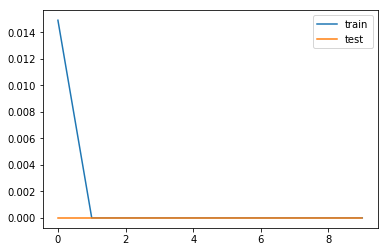

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [38]:
# make a prediction
y_pred = model.predict(np.array(X_test))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rms)

Test RMSE: 0.088


In [39]:
y_test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
y_pred

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                13600     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 16,201
Trainable params: 16,201
Non-trainable params: 0
_________________________________________________________________


In [45]:
print(model.layers[3].trainable_weights)

[<tf.Variable 'dense_2/kernel:0' shape=(50, 1) dtype=float32, numpy=
array([[-0.14013992],
       [-0.3487036 ],
       [-0.0462781 ],
       [ 0.04201694],
       [-0.26017377],
       [ 0.15265572],
       [-0.24218784],
       [ 0.2892847 ],
       [-0.0038686 ],
       [-0.22978824],
       [ 0.20423661],
       [-0.15868852],
       [-0.02355743],
       [ 0.19220968],
       [ 0.20811051],
       [-0.25439534],
       [-0.03889391],
       [-0.15775403],
       [ 0.31000644],
       [ 0.23922156],
       [ 0.03341135],
       [-0.02004394],
       [-0.30431348],
       [ 0.01844909],
       [-0.2893058 ],
       [ 0.20205851],
       [-0.17645304],
       [ 0.15077221],
       [-0.15198009],
       [ 0.22483349],
       [-0.13454981],
       [-0.15951332],
       [-0.11616542],
       [ 0.15597878],
       [ 0.02669648],
       [-0.17804062],
       [ 0.23488373],
       [ 0.15628488],
       [ 0.26236522],
       [-0.12473628],
       [ 0.22915387],
       [ 0.16312891],
       

In [47]:
units = int(int(model.layers[0].trainable_weights[0].shape[1])/4)
print("No units: ", units)

W = model.layers[0].get_weights()[0]
U = model.layers[0].get_weights()[1]
b = model.layers[0].get_weights()[2]

W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

No units:  50


In [50]:
W_i

array([[-0.00701016, -0.0316022 , -0.00460641,  0.13586816, -0.03073173,
         0.01571077,  0.09675658, -0.09538725, -0.08945996, -0.06258111,
        -0.0590659 , -0.05638311,  0.03035562, -0.1483089 , -0.10216343,
        -0.1334774 ,  0.06818391, -0.12942114, -0.01977721, -0.04155201,
         0.06400374, -0.0895022 , -0.08229591,  0.14035754,  0.10024749,
        -0.0799347 , -0.09651691, -0.0019149 , -0.04552229,  0.06337912,
         0.04259656,  0.02816052, -0.13696802, -0.14225186,  0.02336933,
         0.01588033, -0.08962376, -0.04277421, -0.15433224, -0.01549957,
         0.03295775,  0.05129708, -0.10499717, -0.0775494 ,  0.03501481,
        -0.10449632, -0.09911635, -0.04175907,  0.04705478, -0.15166335],
       [ 0.04438613, -0.10160852,  0.03416422, -0.09663375, -0.15653078,
         0.02850227, -0.02349935,  0.16561529, -0.17317562, -0.13521111,
         0.05241609, -0.11615089,  0.03188342,  0.04018538,  0.04862582,
         0.09526005, -0.11041822, -0.00350251,  0.